In [2]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
counts = pd.read_csv('C:/Users/user/Downloads/2117ensemble.csv')

In [4]:
counts = counts.transpose()
counts.columns = counts.iloc[0] 
counts = counts.drop(counts.index[0])
counts = counts.astype(float)

In [5]:
sample = pd.read_csv('c:/Users/user/Downloads/clin2117.csv')

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
sample['Label']=labelencoder.fit_transform(sample.iloc[:,3].values)

In [7]:
# Assign response, and split data for train and test
y =  sample['Label']
X_train, X_test, y_train, y_test = train_test_split(counts,
                                                    y,
                                                    test_size = 0.3,random_state=132)
                                                
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (130, 18482)
X_test shape (56, 18482)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#  Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000)  

# train the Logistic Regression classifier
log_reg_classifier.fit(X_train, y_train)

#  predictions on the test set
y_pred = log_reg_classifier.predict(X_test)

# evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9821428571428571


bincount prediction: [34 22]


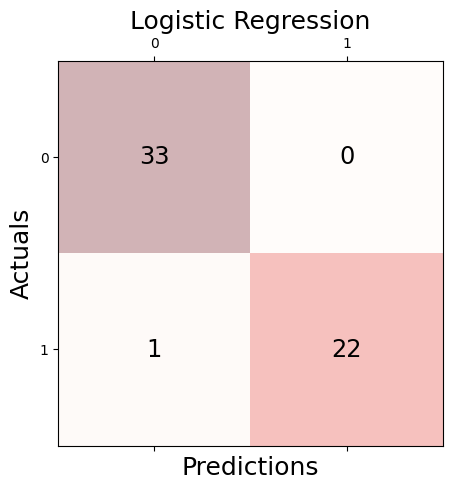

In [13]:
preds = log_reg_classifier.predict(X_test)
prediction =[]
for i in preds:
    if i >=0.5:
        prediction.append(1)
    else:
        prediction.append(0)
print("bincount prediction:", np.bincount(prediction))
conf_matrix = confusion_matrix(y_true = y_test, y_pred=prediction)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression', fontsize=18)

plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#  true positives, false negatives, true negatives, and false positives
tn, fp, fn, tp = cm.ravel()

# sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9565217391304348
Specificity: 1.0


In [9]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.982
F1 Score: 0.978
Precision: 1.000
Recall: 0.957
